### SQL → pandas DataFrame → 시각화 방법

(1) 먼저 DB 연결을 파이썬 쪽에서 잡아놓기

(2) read_sql로 쿼리 결과를 DataFrame으로 가져오기

(3) 바로 시각화 (matplotlib or seaborn)

---

1. Fraud vs Non-fraud 거래 금액 분포 (Histogram)

In [1]:
# 시각화 스타일 설정
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'Malgun Gothic' # Windows 한글 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

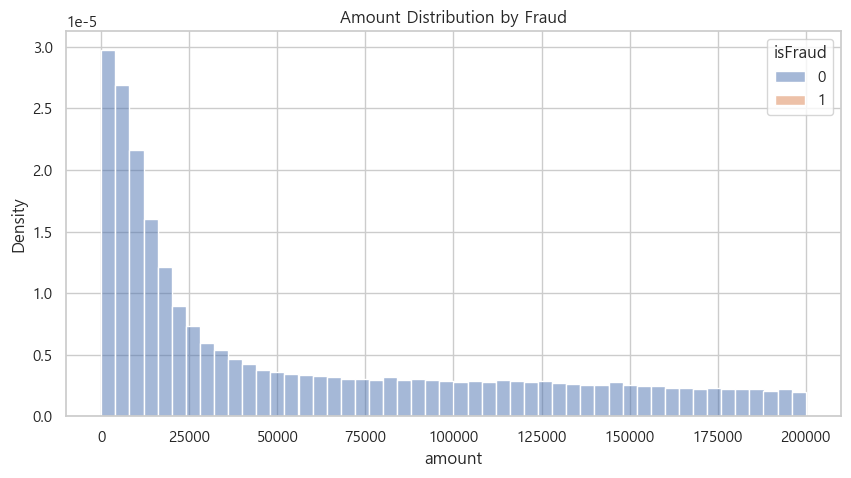

In [2]:
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine("sqlite:///paysim.db")

query = """
SELECT amount, isFraud
FROM PaySim
WHERE amount < 200000; -- 극단값 제거
"""

df = pd.read_sql(query, engine)

plt.figure(figsize=(10, 5))
sns.histplot(df, x="amount", hue="isFraud", bins=50, stat="density")
plt.title("Amount Distribution by Fraud")
plt.show()


2. 거래 유형(type)별 평균 금액 비교 (Bar Chart)

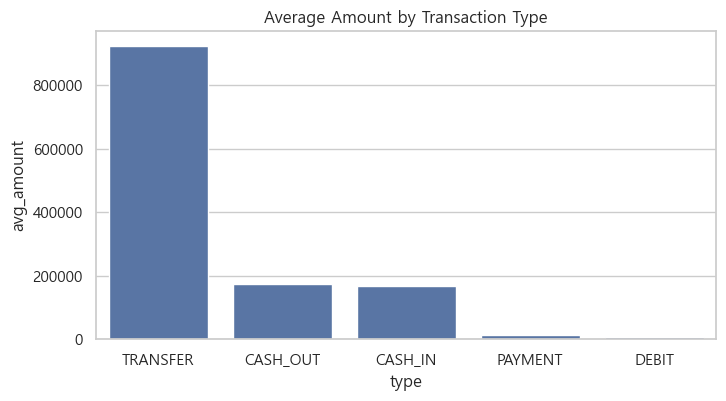

In [3]:
query = """
SELECT type, AVG(amount) AS avg_amount
FROM PaySim
GROUP BY type
ORDER BY avg_amount DESC;
"""

df = pd.read_sql(query, engine)

plt.figure(figsize=(8, 4))
sns.barplot(df, x="type", y="avg_amount")
plt.title("Average Amount by Transaction Type")
plt.show()


3. step(시간 흐름)별 Fraud 발생 추이 (Line Chart)

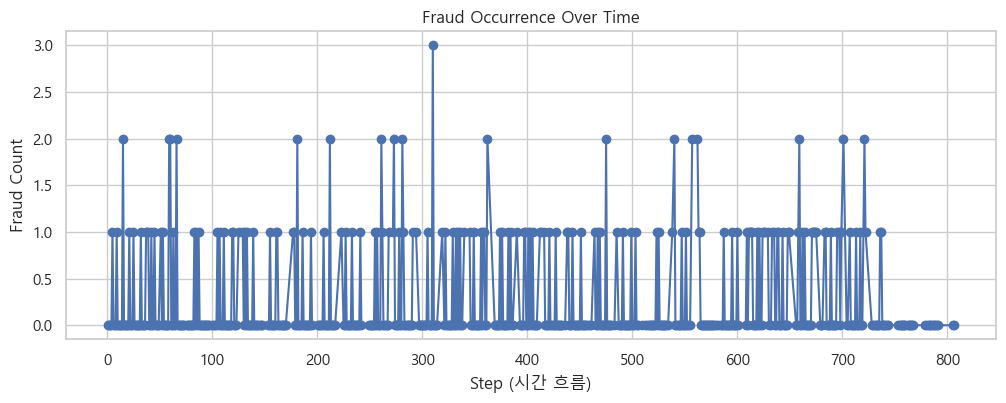

In [4]:
query = """
SELECT step, SUM(isFraud) AS fraud_count
FROM PaySim
GROUP BY step
ORDER BY step;
"""

df = pd.read_sql(query, engine)

plt.figure(figsize=(12, 4))
plt.plot(df["step"], df["fraud_count"], marker="o")
plt.xlabel("Step (시간 흐름)")
plt.ylabel("Fraud Count")
plt.title("Fraud Occurrence Over Time")
plt.show()


4. Fraud / Non-fraud의 계좌 잔액 변화 비교 (Boxplot)

oldbalanceOrg → newbalanceOrg 변화량 분석

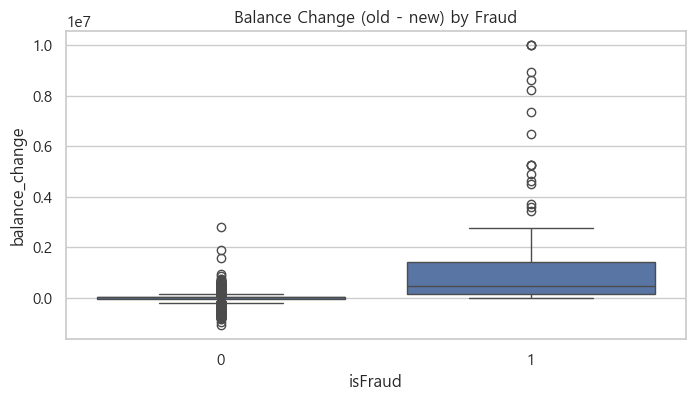

In [5]:
query = """
SELECT
    (oldbalanceOrg - newbalanceOrig) AS balance_change,
    isFraud
FROM PaySim
WHERE oldbalanceOrg > 0 AND newbalanceOrig >= 0;
"""

df = pd.read_sql(query, engine)

plt.figure(figsize=(8, 4))
sns.boxplot(df, x="isFraud", y="balance_change")
plt.title("Balance Change (old - new) by Fraud")
plt.show()


5. 수취인(oldbalanceDest) 잔액과 거래 금액 관계 (Scatter Plot)

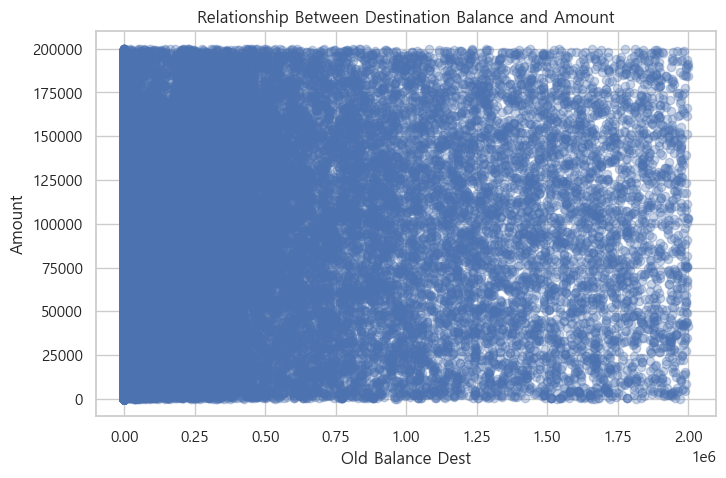

In [6]:
query = """
SELECT amount, oldbalanceDest
FROM PaySim
WHERE amount < 200000 AND oldbalanceDest < 2000000;
"""

df = pd.read_sql(query, engine)

plt.figure(figsize=(8, 5))
plt.scatter(df["oldbalanceDest"], df["amount"], alpha=0.3)
plt.xlabel("Old Balance Dest")
plt.ylabel("Amount")
plt.title("Relationship Between Destination Balance and Amount")
plt.show()


6. Fraud 비율 시각화 (Pie Chart 혹은 Bar Chart)

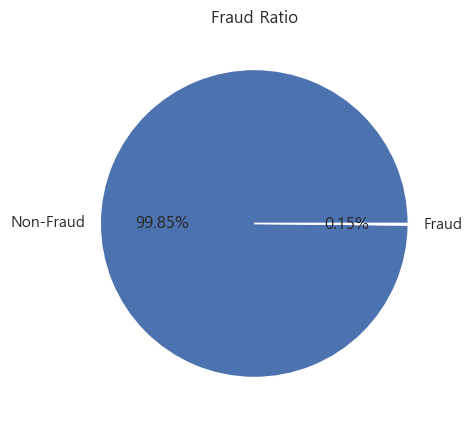

In [7]:
query = """
SELECT isFraud, COUNT(*) AS cnt
FROM PaySim
GROUP BY isFraud;
"""

df = pd.read_sql(query, engine)

plt.figure(figsize=(5, 5))
plt.pie(df["cnt"], labels=["Non-Fraud", "Fraud"], autopct="%.2f%%")
plt.title("Fraud Ratio")
plt.show()
